# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ﷽

# Data Analysis with NumPy and Pyplot

This notebook performs numerical analysis on the cleaned job dataset, using NumPy for calculations and Pyplot for visualizations to reveal key insights.

## ⌞Import Required Libraries⌝
Let's start by importing the necessary packages!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Adjust the module path as needed)
from ipynb.fs.full.jobs_data_cleaning_and_preparation import get_df

## ⌞Retrieve Clean Data⌝
We load the clean dataset so we can work with it.

In [3]:
df = get_df()
print("Clean Data (first 5 rows):")
df.head()

Clean Data (first 5 rows):


,Company Names,Locations,Years of experience,Min Years of Experience,Max Years of Experience,Skills,Salaries,Min Salary,Max Salary,Links
0,Sparks To Ideas,Ahmedabad (Gujarat),0 - 1 Years,0,1,"Core Python, Numpy, Pycharm, DJango, Machine L...",2.05 - 6.10 Lakhs,2.05,6.10,https://www.timesjobs.com/job-detail/hiring-fo...
2,World wide Immigration Service Llp,Luxembourg (Luxembourg),3 - 8 Years,3,8,"network engineer, network administrator, Netwo...",50.00 - 95.00 Lakhs,50.00,95.00,https://www.timesjobs.com/job-detail/network-e...
4,TALPRO INDIA PRIVATE LIMITED,Bengaluru/ Bangalore (Karnataka),5 - 15 Years,5,15,Python,15.30 - 30.60 Lakhs,15.30,30.60,https://www.timesjobs.com/job-detail/python-de...
5,SKYWALK VISA IMMIGRATION,"Australia (Australia), Canada (Canada), New Ze...",2 - 7 Years,2,7,"Python Scripting, Data Analysis, Matlab, C++, ...",53.30 - 87.25 Lakhs,53.30,87.25,https://www.timesjobs.com/job-detail/python-de...
6,Electrobrain modern technologies pvt ltd,"Doha (Doha), Jeddah (Jeddah), Abu Dhabi (Abu D...",2 - 7 Years,2,7,"science, Matplotlib, GIT, Pandas, AWS, Numpy, ...",7.20 - 11.00 Lakhs,7.20,11.00,https://www.timesjobs.com/job-detail/python-de...


##      ⌞  Normalize Salary Data  ⌝
Normalize both the 'Min Salary' and 'Max Salary' columns using a 0-1 range.

### • Normalize 'Min Salary'

In [4]:
min_salary_min = np.min(df['Min Salary'])
min_salary_max = np.max(df['Min Salary'])
normalized_min_salary = (df['Min Salary'] - min_salary_min) / (min_salary_max - min_salary_min)
print("Normalized 'Min Salary' (first 5 rows):")
normalized_min_salary.head()

Normalized 'Min Salary' (first 5 rows):


0    0.014093
2    0.577217
4    0.169701
5    0.615972
6    0.074574
Name: Min Salary, dtype: float64

### • Normalize 'Max Salary'

In [5]:
max_salary_min = np.min(df['Max Salary'])
max_salary_max = np.max(df['Max Salary'])
normalized_max_salary = (df['Max Salary'] - max_salary_min) / (max_salary_max - max_salary_min)
print("Normalized 'Max Salary' (first 5 rows):")
normalized_max_salary.head()

Normalized 'Max Salary' (first 5 rows):


0    0.052524
2    0.959204
4    0.302397
5    0.880163
6    0.102499
Name: Max Salary, dtype: float64

## ⌞Compute Average Salary and Average Experience⌝

Computed:

• Average Salary: The average of 'Min Salary' and 'Max Salary'.

• Average Experience: The average of 'Min Years of Experience' and 'Max Years of Experience'.


In [6]:
avg_salary = (df['Min Salary'] + df['Max Salary']) / 2
avg_experience = (df['Min Years of Experience'] + df['Max Years of Experience']) / 2

print("Average Experience (first 5 rows):")
print(avg_experience.head())
print("\nAverage Salary (first 5 rows):")
print(avg_salary.head())

Average Experience (first 5 rows):
0     0.5
2     5.5
4    10.0
5     4.5
6     4.5
dtype: float64

Average Salary (first 5 rows):
0     4.075
2    72.500
4    22.950
5    70.275
6     9.100
dtype: float64


## ⌞Visualize Salary Distribution⌝

Below we plot the histogram of the 'Min Salary' column to visualize its distribution.

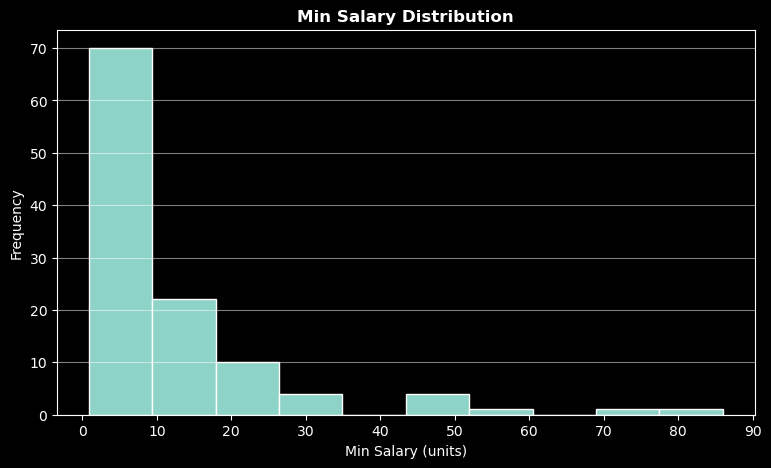

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(9, 5))
plt.hist(df["Min Salary"], edgecolor='white')
plt.title("Min Salary Distribution", fontweight='bold')
plt.xlabel("Min Salary (units)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.xticks(range(0, int(df["Min Salary"].max()) + 10, 10))
plt.show()

## ⌞Salary vs. Experience Analysis⌝

Let's visualize the relationship between average salary and average years of experience.

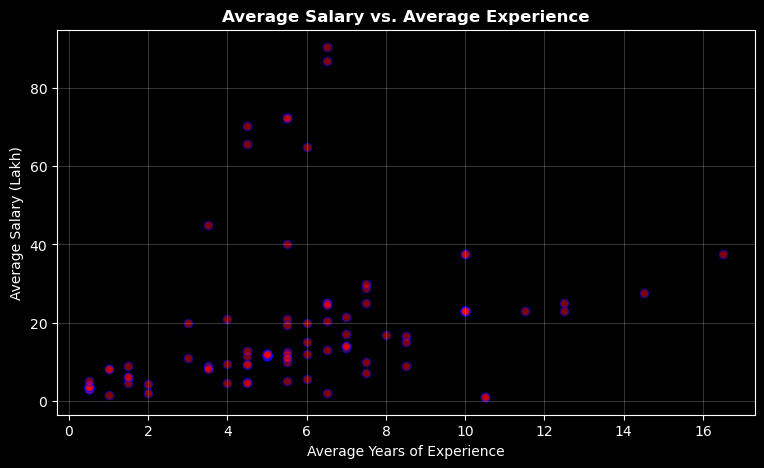

In [8]:
plt.figure(figsize=(9, 5))
plt.scatter(avg_experience, avg_salary, alpha=0.5, color='red', edgecolor='blue')
plt.title("Average Salary vs. Average Experience", fontweight='bold')
plt.xlabel("Average Years of Experience")
plt.ylabel("Average Salary (Lakh)")
plt.grid(True, alpha=0.2)
plt.show()


## ⌞Compute Correlation between Salary and Experience⌝

Compute the Pearson correlation coefficient between average salary and average experience.

In [9]:
correlation = np.corrcoef(avg_experience, avg_salary)
print("Correlation Coefficient (Average Experience vs. Average Salary):")
correlation

Correlation Coefficient (Average Experience vs. Average Salary):


array([[1.        , 0.34722169],
       [0.34722169, 1.        ]])


## ⌞Frequency Analysis: Skills⌝

Analyzing the frequency of skills by cleaning the 'Skills' column, splitting the comma-separated entries, and counting each skill.

### • Process and Count Skills


In [10]:
skills_series = (df['Skills']
                 .str.replace('"', '', regex=False)
                 .str.lower()
                 .str.split(', ')
                 .explode())

unique_skills, skill_counts = np.unique(skills_series, return_counts=True)
skills_dict = dict(zip(unique_skills, skill_counts))
skill_frequency = {skill: cnt for skill, cnt in sorted(skills_dict.items(), key=lambda item: item[1], reverse=True)}
print("Skill Frequency:")
skill_frequency


Skill Frequency:


{'python': 46,
 'machine learning': 21,
 'c++': 17,
 'django': 12,
 'sql': 12,
 'aws': 11,
 'power bi': 11,
 'pandas': 10,
 'artificial intelligence': 9,
 'core python': 8,
 'numpy': 8,
 'business development': 7,
 'data science': 7,
 'html': 7,
 'java': 7,
 'management consulting': 7,
 'spares management': 7,
 'css': 6,
 'data analysis': 6,
 'data cleansing': 6,
 'data extraction': 6,
 'project management': 6,
 'software engineer': 6,
 'data visualization': 5,
 'git': 5,
 'business analyst': 4,
 'coding': 4,
 'communication': 4,
 'data': 4,
 'excel': 4,
 'javascript': 4,
 'js': 4,
 'manager quality control': 4,
 'php': 4,
 'process automation': 4,
 'recruitment': 4,
 'relationship management': 4,
 'shell scripting': 4,
 'software developer': 4,
 'tableau': 4,
 'testing': 4,
 'advance python': 3,
 'ajax': 3,
 'ci/cd': 3,
 'cloud': 3,
 'cloud computing': 3,
 'css 3': 3,
 'data analyst': 3,
 'data manipulation': 3,
 'data structure': 3,
 'deployment': 3,
 'deploymentreporting': 3,
 'deve

### ⌞Visualize Top 10 Skills⌝

Creating a pie chart displaying the top 10 most frequent skills.

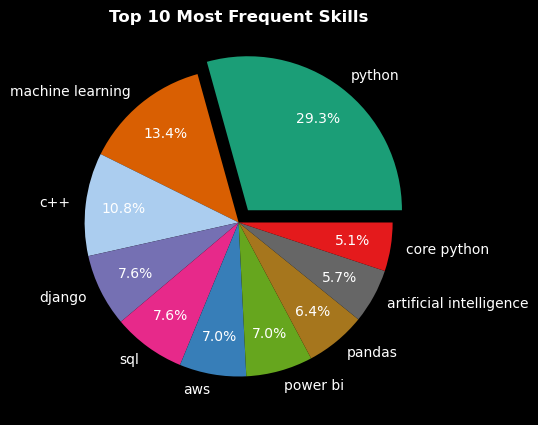

In [11]:
top_n = 10
top_skills_names = list(skill_frequency.keys())[:top_n]
top_skills_counts = list(skill_frequency.values())[:top_n]
explode_skills = [0.1 if i == 0 else 0 for i in range(top_n)]

colors = ["#1b9e77", "#d95f02", "#abcdef", "#7570b3", "#e7298a", 
          "#377eb8", "#66a61e", "#a6761d", "#666666", "#e41a1c"]

plt.figure(figsize=(9, 5))
plt.pie(top_skills_counts, labels=top_skills_names, autopct='%1.1f%%', pctdistance=0.75,
        explode=explode_skills, colors=colors)
plt.title("Top 10 Most Frequent Skills", fontweight='bold')
plt.show()


## ⌞Frequency Analysis: Company Names⌝

Counting how many times each company appears in the dataset.

In [12]:
company_series = np.array(df['Company Names'])
unique_companies, company_counts = np.unique(company_series, return_counts=True)
companies_dict = dict(zip(unique_companies, company_counts))
companies_frequency = {comp: cnt for comp, cnt in sorted(companies_dict.items(), key=lambda item: item[1], reverse=True)}
print("Company Frequency:")
companies_frequency

Company Frequency:


{'SAMPOORNA CONSULTANTS PVT LTD': 19,
 'Electrobrain modern technologies pvt ltd': 17,
 'Sparks To Ideas': 12,
 'TALPRO INDIA PRIVATE LIMITED': 10,
 'MACKENZIE MODERN IT SOLUTIONS PVT LTD': 7,
 'New Global Technologies': 4,
 'SHREE ADISHAKTHI CONSULTANCY': 4,
 'Best InfoSystems Ltd.': 3,
 'World wide Immigration Service Llp': 3,
 'A Leading Firm': 2,
 'AXISVISA IMMIGRATION SERVICES PRIVATE LIMITED': 2,
 'NxtWave': 2,
 'Options & Ideas': 2,
 'RCIC     Recruitment Canada & Immigration Canada (New Delhi)': 2,
 'TEKKSOL GLOBAL': 2,
 'Team Management Services': 2,
 'White Horse Manpower Consultancy P Ltd': 2,
 'ADAL IMMIGRATIONS LLP': 1,
 'Element Skill': 1,
 'FLIGHT TO SUCESS IMMIGRATION LLP': 1,
 'Golden Triangle BES India LLP': 1,
 'IRANIAN CONSTRUCTION GROUP': 1,
 'LTIMindtree Ltd.': 1,
 'Leading Service based MNC': 1,
 'Meetium Pvt ltd': 1,
 'PRIMEX IMMIGRATION LLP': 1,
 'SKYWALK VISA IMMIGRATION': 1,
 'SKYWALK VISA IMMIGRATION SERVICES LLP': 1,
 'Sameer namdep Kedari': 1,
 'Sanskruti 

### • Visualize Top 10 Companies

Creating a pie chart representing the top 10 most frequent companies.

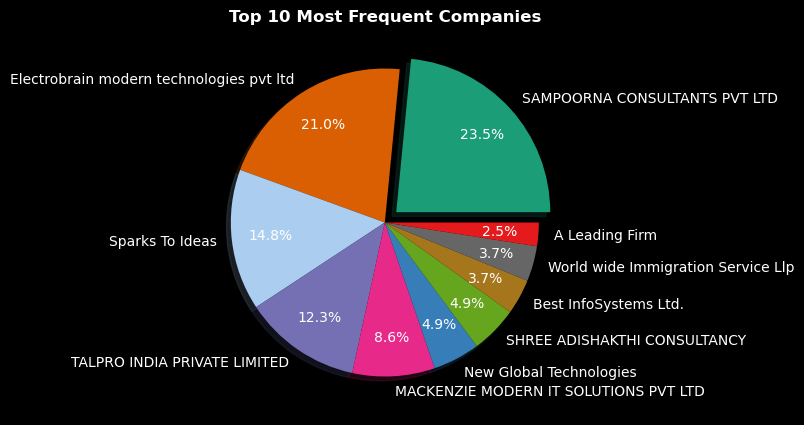

In [13]:
top_company_names = list(companies_frequency.keys())[:top_n]
top_company_counts = list(companies_frequency.values())[:top_n]
explode_companies = [0.1 if i == 0 else 0 for i in range(len(top_company_counts))]

plt.figure(figsize=(9, 5))
plt.pie(top_company_counts, labels=top_company_names, autopct="%1.1f%%", explode=explode_companies,
        shadow=True, pctdistance=0.75, colors=colors)
plt.title("Top 10 Most Frequent Companies", fontweight='bold')
plt.show()


## ⌞Frequency Analysis: Locations⌝

Counting how many times each location occurs in the dataset.

In [14]:
location_series = (df['Locations']
                   .str.replace('"', '', regex=False)
                   .str.lower()
                   .str.split(', ')
                   .explode())
unique_locations, location_counts = np.unique(location_series, return_counts=True)
locations_dict = dict(zip(unique_locations, location_counts))
location_frequency = {loc: cnt for loc, cnt in sorted(locations_dict.items(), key=lambda item: item[1], reverse=True)}
print("Location Frequency:")
location_frequency


Location Frequency:


{'bengaluru/ bangalore (karnataka)': 39,
 'chennai (tamil nadu)': 24,
 'ahmedabad (gujarat)': 22,
 'mumbai (maharashtra)': 19,
 'hyderabad/ secunderabad (telangana)': 16,
 'pune (maharashtra)': 16,
 'gurgaon (haryana)': 13,
 'noida/ greater noida (uttar pradesh)': 13,
 'delhi (delhi)': 11,
 'delhi/ ncr (delhi)': 10,
 'canada (canada)': 9,
 'kolkata (west bengal)': 9,
 'australia (australia)': 8,
 'chandigarh (punjab)': 7,
 'visakhapatnam (andhra pradesh)': 7,
 'vijayawada (andhra pradesh)': 6,
 'gandhinagar (gujarat)': 5,
 'junagarh (gujarat)': 4,
 'luxembourg (luxembourg)': 4,
 'mangalore (karnataka)': 4,
 'mysoru/ mysore (karnataka)': 4,
 'new zealand (new zealand)': 4,
 'singapore (singapore)': 4,
 'bhavnagar (gujarat)': 3,
 'germany (germany)': 3,
 'navi mumbai (maharashtra)': 3,
 'rajkot (gujarat)': 3,
 'daman & diu (union territories)': 2,
 'dubai (dubai)': 2,
 'gulf/ midle east (gulf/ midle east)': 2,
 'thane (maharashtra)': 2,
 'united kingdom (uk) (united kingdom (uk))': 2,
 '

### • Visualize Top 10 Locations

Creating a pie chart for the top 10 locations.

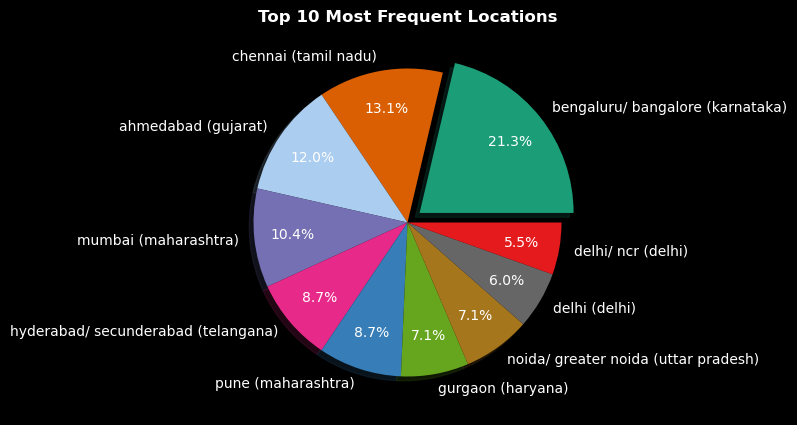

In [15]:
top_location_names = list(location_frequency.keys())[:top_n]
top_location_counts = list(location_frequency.values())[:top_n]
explode_locations = [0.1 if i == 0 else 0 for i in range(len(top_location_counts))]

plt.figure(figsize=(9, 5))
plt.pie(top_location_counts, labels=top_location_names, autopct='%1.1f%%', explode=explode_locations,
        shadow=True, pctdistance=0.75, colors=colors)
plt.title("Top 10 Most Frequent Locations", fontweight='bold')
plt.show()


## ⌞Salary Outlier Analysis⌝

We now analyze salary outliers by computing the salary range and using z-scores.


In [16]:
salary_range = df['Max Salary'] - df['Min Salary']
mean_range = np.mean(salary_range)
std_range = np.std(salary_range)
salary_z_score = (avg_salary - mean_range) / std_range

print("Salary Range Statistics:")
print(" Mean:", mean_range)
print(" Std:", std_range)
print(" Salary Z-Scores (first 5 rows):")
salary_z_score.head()

Salary Range Statistics:
 Mean: 10.572566371681416
 Std: 8.509466335061306
 Salary Z-Scores (first 5 rows):


0   -0.763569
2    7.277476
4    1.454549
5    7.016002
6   -0.173050
dtype: float64

### • Filter Out Outliers

We filter out records that have a z-score above a threshold (here, 3) to remove salary outliers.

In [17]:
z_threshold = 3  # you can adjust this threshold
mask = salary_z_score < z_threshold
filtered_df = df[mask]

print("Filtered DataFrame after outlier removal (first 5 rows):")
filtered_df.head()

Filtered DataFrame after outlier removal (first 5 rows):


,Company Names,Locations,Years of experience,Min Years of Experience,Max Years of Experience,Skills,Salaries,Min Salary,Max Salary,Links
0,Sparks To Ideas,Ahmedabad (Gujarat),0 - 1 Years,0,1,"Core Python, Numpy, Pycharm, DJango, Machine Learning, Pandas, Open Cv, HTML, css, SQL",2.05 - 6.10 Lakhs,2.05,6.10,https://www.timesjobs.com/job-detail/hiring-for-python-developer-sparks-to-ideas-ahmedabad-0-to-1-yrs-jobid-FDcok8ap1yBzpSvf__PLUS__uAgZw==&source=srp
4,TALPRO INDIA PRIVATE LIMITED,Bengaluru/ Bangalore (Karnataka),5 - 15 Years,5,15,Python,15.30 - 30.60 Lakhs,15.30,30.60,https://www.timesjobs.com/job-detail/python-developer-talpro-india-private-limited-bengaluru-bangalore-5-to-15-yrs-jobid-Pq7UUOQ82S5zpSvf__PLUS__uAgZw==&source=srp
6,Electrobrain modern technologies pvt ltd,"Doha (Doha), Jeddah (Jeddah), Abu Dhabi (Abu Dhabi), Dubai (Dubai), Sharjah (Sharjah)",2 - 7 Years,2,7,"science, Matplotlib, GIT, Pandas, AWS, Numpy, Python, Django, Mongodb, Node, js",7.20 - 11.00 Lakhs,7.20,11.00,https://www.timesjobs.com/job-detail/python-developer-electrobrain-modern-technologies-pvt-ltd-doha-jeddah-abu-dhabi-dubai-sharjah-2-to-7-yrs-jobid-Doxfs75__SLASH__vv9zpSvf__PLUS__uAgZw==&source=srp
8,Sparks To Ideas,"Ahmedabad (Gujarat), Bhavnagar (Gujarat), Gandhinagar (Gujarat), Junagarh (Gujarat), Rajkot (Gujarat)",0 - 1 Years,0,1,"N, Core Python, Pandas, Numpy, Paycharm, SQL, Machine Learning, Data, Data Structure",1.05 - 6.10 Lakhs,1.05,6.10,https://www.timesjobs.com/job-detail/python-internship-sparks-to-ideas-ahmedabad-bhavnagar-gandhinagar-junagarh-rajkot-0-to-1-yrs-jobid-LLIcoq32tvpzpSvf__PLUS__uAgZw==&source=srp
9,Electrobrain modern technologies pvt ltd,"Ahmedabad (Gujarat), Bengaluru/ Bangalore (Karnataka), Chennai (Tamil Nadu), Hyderabad/ Secunderabad (Telangana), Mumbai (Maharashtra)",4 - 9 Years,4,9,"Node, js, Mongodb, Django, Python, Numpy, AWS, Api, Engineer, system administrator",8.20 - 17.65 Lakhs,8.20,17.65,https://www.timesjobs.com/job-detail/python-developer-electrobrain-modern-technologies-pvt-ltd-ahmedabad-bengaluru-bangalore-chennai-hyderabad-secunderabad-mumbai-4-to-9-yrs-jobid-4aumk__PLUS__VMTKNzpSvf__PLUS__uAgZw==&source=srp


## ⌞Visualize Salary Range and Experience Trends⌝

We visualize trends by sorting the salary range and average experience.

### • Bar Plot: Salary Range Sorted by Average Experience

We sort the salary range based on average experience and display it as a bar plot.


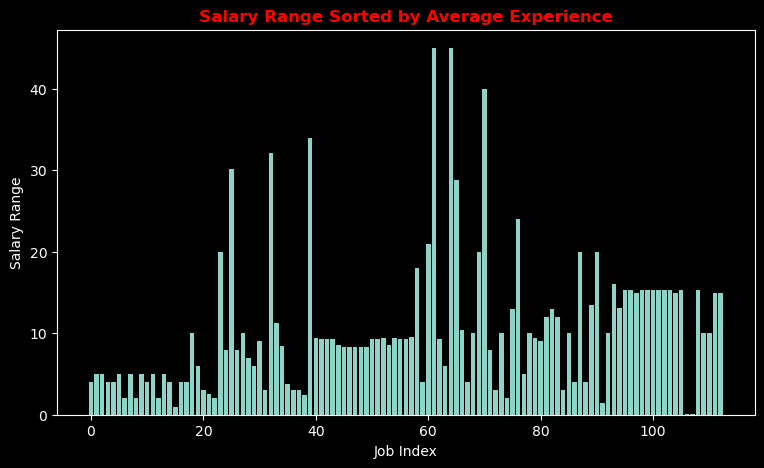

In [18]:
order = np.argsort(avg_experience)
sorted_salary_range = salary_range.iloc[order]
job_indices = range(len(sorted_salary_range))

plt.style.use('dark_background')
plt.figure(figsize=(9, 5))
plt.bar(job_indices, sorted_salary_range)
plt.title('Salary Range Sorted by Average Experience', fontweight='bold', color='red')
plt.xlabel('Job Index')
plt.ylabel('Salary Range')
plt.show()

### • Line Plot: Sorted Average Experience

We sort and plot the average experience to visualize its trend.

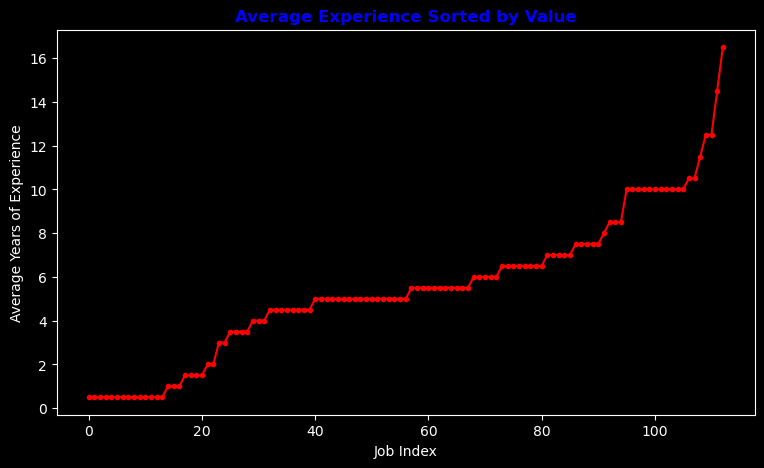

In [19]:
sorted_experience = avg_experience.iloc[order]
experience_indices = range(len(sorted_experience))

plt.figure(figsize=(9, 5))
plt.plot(experience_indices, sorted_experience, color='red', marker='.')
plt.title("Average Experience Sorted by Value", fontweight='bold', color='blue')
plt.xlabel('Job Index')
plt.ylabel('Average Years of Experience')
plt.show()

# End of Data Analysis Notebook

In this notebook, we:

• Imported the clean dataset.

• Performed basic statistical analyses and normalization.

• Explored salary distributions and salary vs. experience relationships.

• Conducted detailed frequency analysis on skills, companies, and locations.

• Applied outlier filtering.

• Visualized trends and distributions in separate cells.

# ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤٱلسَّلَامُ عَلَيْكُمْ وَرَحْمَةُ ٱللَّهِ وَبَرَكَاتُهُ